In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import _pickle as pickle
%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
with open('ORENIST.data','rb') as file:
    images, labels = pickle.load(file,encoding='latin1')

In [3]:
x = tf.placeholder(tf.float32,[None, 784])
w = tf.Variable(tf.zeros([784, 3]))
w0 = tf.Variable(tf.zeros([3]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

# フィルターを作らずに作成されている。ソフトマックス関数が次元数が多くても判断可能なため？ 
# あまり、畳み込み層を使わなくてもできないことはない

In [4]:
t = tf.placeholder(tf.float32, [None, 3])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
i = 0
for _ in range(200):
    i += 1
    sess.run(train_step, feed_dict={x:images, t:labels})
    if i % 10 == 0:
        loss_val, acc_val = sess.run(
            [loss, accuracy], feed_dict={x:images, t:labels})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 10, Loss: 63.603630, Accuracy: 0.955556
Step: 20, Loss: 43.305790, Accuracy: 0.988889
Step: 30, Loss: 31.269156, Accuracy: 0.988889
Step: 40, Loss: 23.833084, Accuracy: 1.000000
Step: 50, Loss: 18.978050, Accuracy: 1.000000
Step: 60, Loss: 15.623882, Accuracy: 1.000000
Step: 70, Loss: 13.190953, Accuracy: 1.000000
Step: 80, Loss: 11.352420, Accuracy: 1.000000
Step: 90, Loss: 9.916343, Accuracy: 1.000000
Step: 100, Loss: 8.765472, Accuracy: 1.000000
Step: 110, Loss: 7.824162, Accuracy: 1.000000
Step: 120, Loss: 7.041384, Accuracy: 1.000000
Step: 130, Loss: 6.381474, Accuracy: 1.000000
Step: 140, Loss: 5.818683, Accuracy: 1.000000
Step: 150, Loss: 5.333918, Accuracy: 1.000000
Step: 160, Loss: 4.912724, Accuracy: 1.000000
Step: 170, Loss: 4.543945, Accuracy: 1.000000
Step: 180, Loss: 4.218847, Accuracy: 1.000000
Step: 190, Loss: 3.930489, Accuracy: 1.000000
Step: 200, Loss: 3.673295, Accuracy: 1.000000


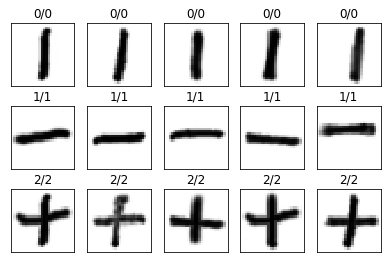

In [7]:
images, labels = images,labels
p_val = sess.run(p, feed_dict={x:images, t:labels})
fig = plt.figure(figsize = (8,15))

for i in range(100):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
#         print(i)
        if prediction != i:
            continue
        if (c < 6 and i == actual) or (c >= 6 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d/%d' % (prediction,actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break

In [8]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;

    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [22]:
from IPython.display import HTML
HTML(input_form + javascript)

<BarContainer object of 3 artists>

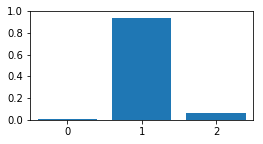

In [21]:
keep_prob = tf.placeholder(tf.float32)
p_val = sess.run(p, feed_dict={x:[image], keep_prob:1.0})

fig = plt.figure(figsize=(4,2))
pred = p_val[0]
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks(range(10))
subplot.set_xlim(-0.5,2.5)
subplot.set_ylim(0,1)
subplot.bar(range(3), pred, align='center')